In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, KFold

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, KBinsDiscretizer, PolynomialFeatures

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, RANSACRegressor, Ridge, Lasso, LinearRegression

from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, precision_recall_curve, PrecisionRecallDisplay, make_scorer
from sklearn.metrics import mean_squared_error

from sklearn.compose import ColumnTransformer, make_column_selector,make_column_transformer, TransformedTargetRegressor
import category_encoders as ce
from scipy import stats

from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score, make_scorer, fbeta_score

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, StratifiedShuffleSplit, cross_val_score, GridSearchCV


### Область работы 2 (поиск  модели .... )

In [21]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv'# содержит только имя файла, без имен папок !!!
path_train_y = 'train_Y.csv'

In [22]:
df_x = pd.read_csv(path_train)
display(df_x.head())
df_y = pd.read_csv(path_train_y)
df_y.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0


,Diabetes_binary
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [23]:
display(df_x.info())
display(df_x.describe())
display(df_x.isna().sum())
display(df_y.info())
display(df_y.describe())
display(df_y.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

None

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,...,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000
mean,0.563879,0.523468,0.975741,29.862551,0.475118,0.062834,0.148766,0.701940,0.610814,0.788844,...,0.954585,0.094145,2.835272,3.732829,5.788105,0.252349,0.457213,8.587294,4.923485,5.703292
std,0.495908,0.499454,0.153855,7.144498,0.499386,0.242666,0.355861,0.457411,0.487571,0.408133,...,0.208215,0.292034,1.112528,8.145554,10.044184,0.434365,0.498171,2.847747,1.027849,2.174629
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,5.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diabetes_binary  47363 non-null  float64
dtypes: float64(1)
memory usage: 370.2 KB


None

,Diabetes_binary
count,47363.000000
mean,0.500011
std,0.500005
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


Diabetes_binary    0
dtype: int64

In [90]:
#bmi 98 это не выброс, хотя и значительно отклоняется от средних значений

среднее в у 0.5 - классы распределены равномерно

In [24]:
df_x['Diabetes_binary'] = df_y
df = df_x
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0,1.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0,1.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0,1.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47358,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0,1.0
47359,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,2.0,0.0,1.0,0.0,1.0,9.0,6.0,8.0,0.0
47360,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,5.0,20.0,0.0,0.0,9.0,4.0,6.0,1.0
47361,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0,8.0,0.0


In [25]:
df.duplicated().sum()

785

In [26]:
df = df.drop_duplicates()
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0,1.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0,1.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0,1.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47358,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0,1.0
47359,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,2.0,0.0,1.0,0.0,1.0,9.0,6.0,8.0,0.0
47360,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,5.0,20.0,0.0,0.0,9.0,4.0,6.0,1.0
47361,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0,8.0,0.0


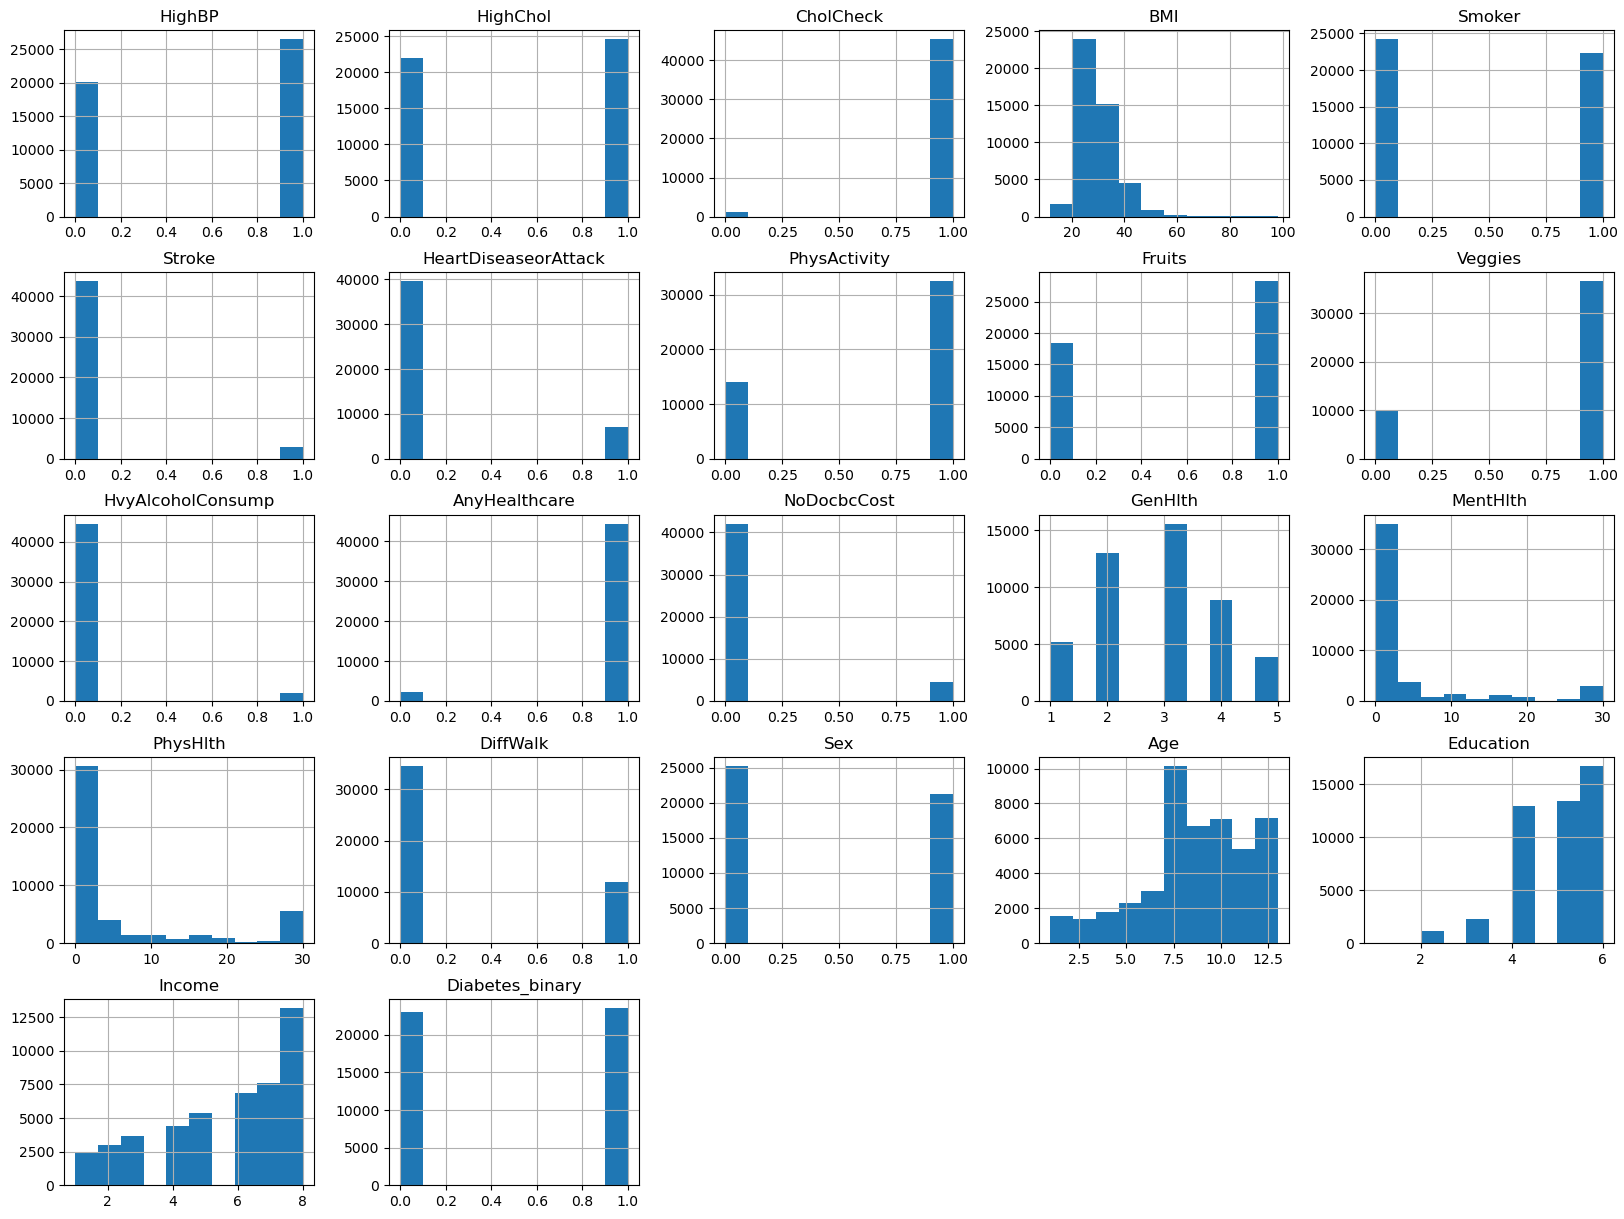

In [49]:
df.hist( figsize=(20, 15))
plt.show()

некоторые данные сбалансированы, некоторые - нет

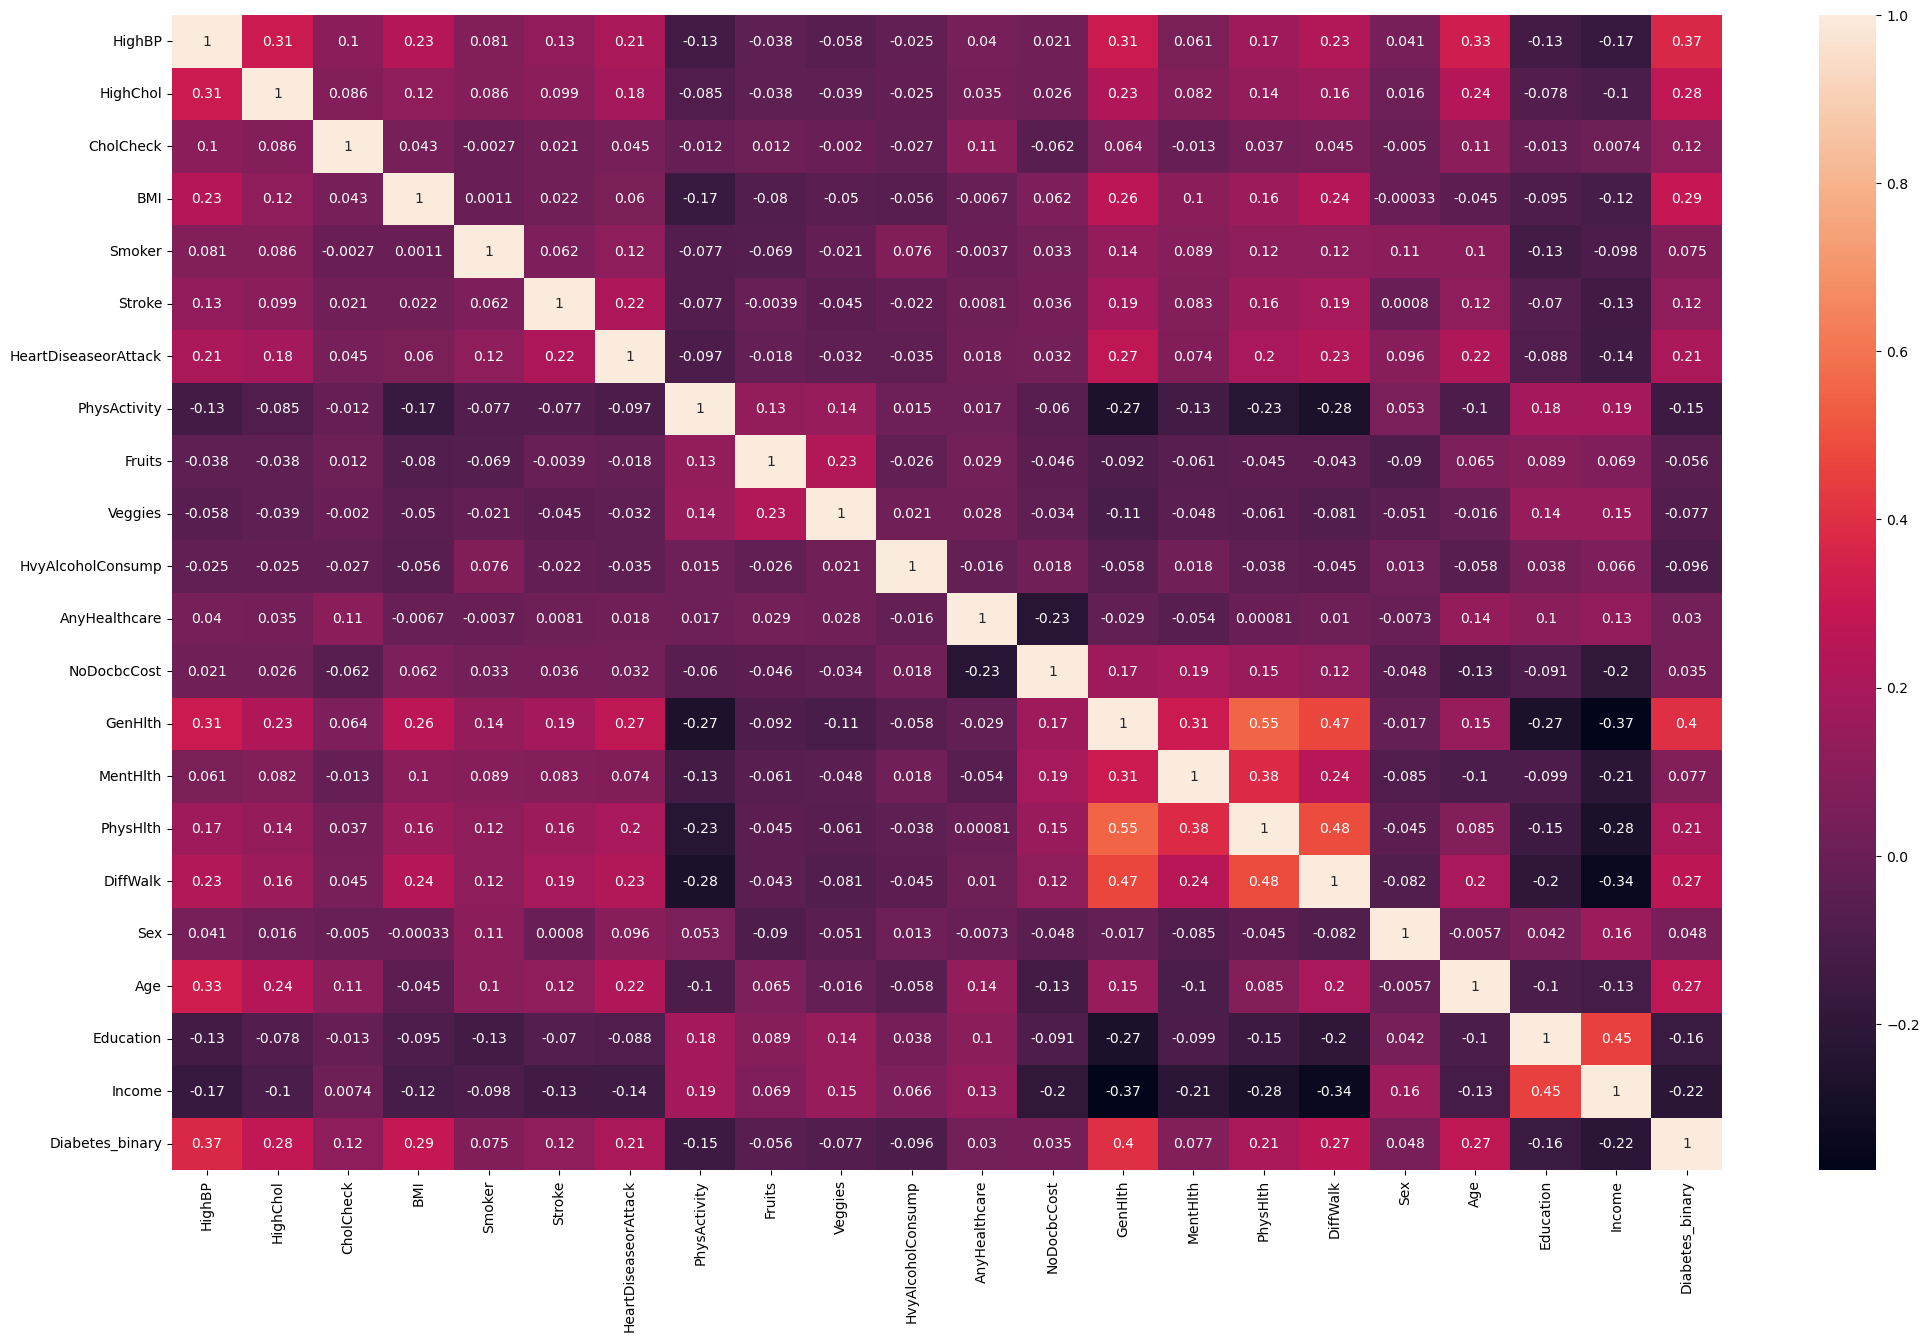

In [52]:
corr_matrix = df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [53]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Random forest

Для проведения отбора значений гиперпараметров по очереди будем изменять один при фиксированных остальных и выбирать оптимальное значение

Определим метрику, штрафующую за ложноотрицательный результат в два раза сильнее:

In [55]:
def calculate_fbeta_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=np.sqrt(2)) 

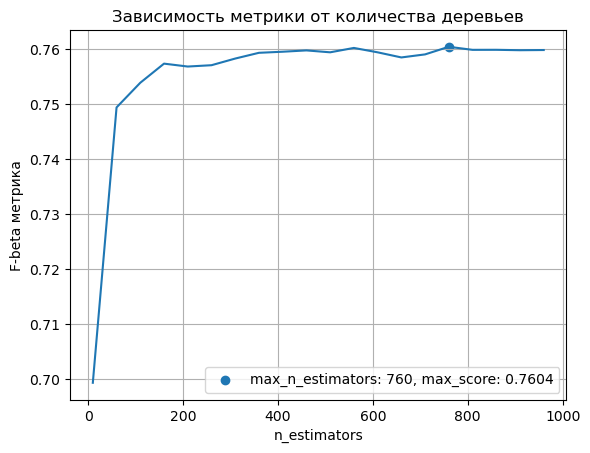

n_estimators = 760, F-beta = 0.7604


In [57]:
n_estimators_range = range(10, 1001, 50)  # перебор количества деревьев 
scores = []
for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = calculate_fbeta_score(y_test, y_pred)  # Вычисляем F-beta
    scores.append(score)
max_index = scores.index(max(scores))
max_n_estimators = n_estimators_range[max_index]
plt.plot(n_estimators_range, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.grid()
plt.scatter(max_n_estimators, max(scores), label=f'max_n_estimators: {max_n_estimators}, max_score: {max(scores):.4f}')
plt.legend()
plt.show()
print(f"n_estimators = {max_n_estimators}, F-beta = {max(scores):.4f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 760 out of 760 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:    1.0s 

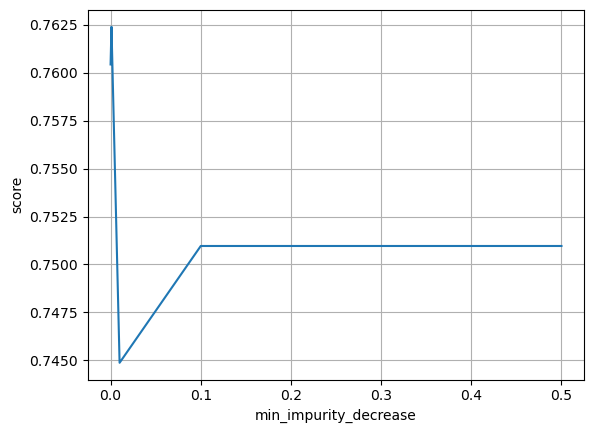

In [92]:
min_impurity_decrease_range = [0.0, 0.001, 0.01, 0.1, 0.2, 0.5]
scores = []
for min_impurity in min_impurity_decrease_range:
    model = RandomForestClassifier(n_estimators= 760, random_state=42, n_jobs=-1, verbose=1, min_impurity_decrease = min_impurity)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = calculate_fbeta_score(y_test, y_pred)
    scores.append(score)
plt.plot(min_impurity_decrease_range,scores)
plt.xlabel('min_impurity_decrease')
plt.ylabel('score')
plt.grid()
plt.show()

Значит, оптимально не менять min_impurity

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:   12.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 760 out of 760 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:   12.8s 

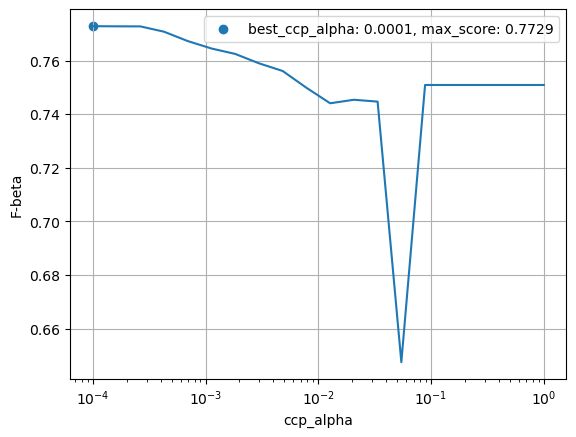

Лучший ccp_alpha: 0.0001, F-beta: 0.7729


In [93]:
ccp_alphas = np.logspace(-4, 0, 20)  # Логарифмическая шкала от 0.0001 до 1.0
scores = []
for ccp in ccp_alphas:
    model = RandomForestClassifier(n_estimators= 760, random_state=42, n_jobs=-1, verbose=1, ccp_alpha=ccp)
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    score = calculate_fbeta_score(y_test, y_pred)
    scores.append(score)
plt.semilogx(ccp_alphas, scores)  # Используем логарифмическую ось
plt.xlabel('ccp_alpha')
plt.ylabel('F-beta')
plt.grid()
best_ccp_alpha = ccp_alphas[scores.index(max(scores))]
plt.scatter(best_ccp_alpha, max(scores), label=f'best_ccp_alpha: {best_ccp_alpha}, max_score: {max(scores):.4f}')
plt.legend()
plt.show()
print(f"Лучший ccp_alpha: {best_ccp_alpha}, F-beta: {max(scores):.4f}")

Итоговая модель:

In [63]:
model = RandomForestClassifier(n_estimators= 760, random_state=42, n_jobs=-1, verbose=1, ccp_alpha=0.0001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = calculate_fbeta_score(y_test, y_pred)
score

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:    3.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 760 out of 760 | elapsed:    0.1s finished


0.7951498903241531

Treshold:

In [97]:
y_pred_proba_rf = model.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0, 1, 101)
fbeta_scores_rf = []
for threshold in thresholds:
    y_pred_optimal_rf = (y_pred_proba_rf >= threshold).astype(int)   
    fbeta_rf = fbeta_score(y_test, y_pred_optimal_rf, beta=np.sqrt(2))
    fbeta_scores_rf.append(fbeta_rf)
best_threshold_rf = thresholds[np.argmax(fbeta_scores_rf)]
best_fbeta_rf = np.max(fbeta_scores_rf)
print(f"Best Threshold for Random Forest: {best_threshold_rf:.2f}")
print(f"Best F-beta Score for Random Forest: {best_fbeta_rf:.2f}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 760 out of 760 | elapsed:    0.2s finished


Best Threshold for Random Forest: 0.00
Best F-beta Score for Random Forest: 0.75


### Градиентный бустинг

Аналогичным образом для градиентного бустинга по очереди переберем значения для гиперпараметров

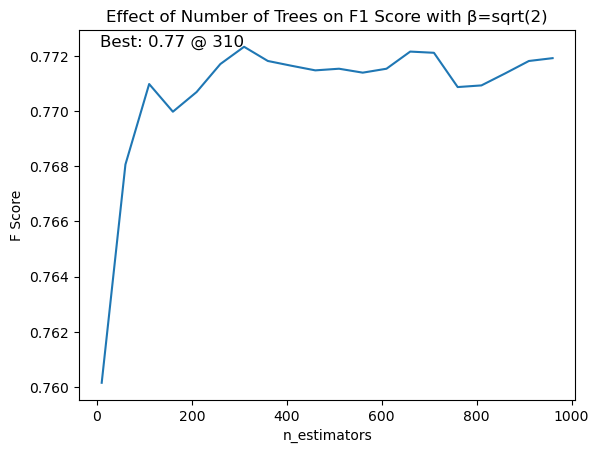

In [65]:
n_estimators_range = range(10, 1001, 50)
f1_scores = []
for n_estimators in n_estimators_range:
    clf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    f1 = calculate_fbeta_score(y_test, y_pred)
    f1_scores.append(f1)
best_index = np.argmax(f1_scores)
best_n_estimators = n_estimators_range[best_index]
best_f1 = f1_scores[best_index]
plt.plot(n_estimators_range, f1_scores)
plt.xlabel('n_estimators')
plt.ylabel('F Score')
plt.text(best_n_estimators, best_f1, f'F-score: {best_f1:.2f} @ n_estimators: {best_n_estimators}', fontsize=12, ha='right')
plt.show()

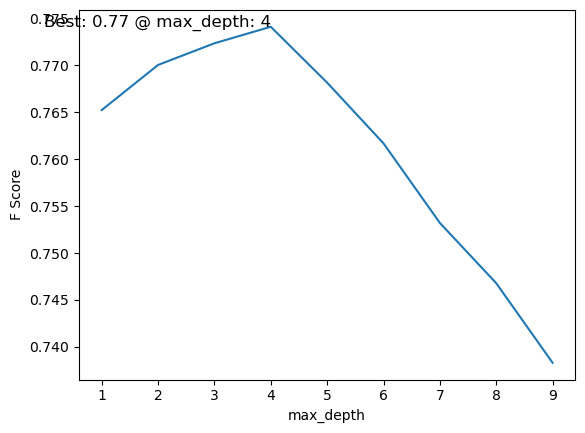

In [66]:
max_depth_range = range(1, 10) 
f1_scores = []
for max_depth in max_depth_range:
    clf = GradientBoostingClassifier(n_estimators=310, max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = calculate_fbeta_score(y_test, y_pred)
    f1_scores.append(f1)
best_index = np.argmax(f1_scores)
best_max_depth = max_depth_range[best_index]
best_f1 = f1_scores[best_index]
plt.plot(max_depth_range, f1_scores)
plt.xlabel('max_depth')
plt.ylabel('F Score')
plt.text(best_max_depth, best_f1, f'Best: {best_f1:.2f} @ max_depth: {best_max_depth}', fontsize=12, ha='right')
plt.show()

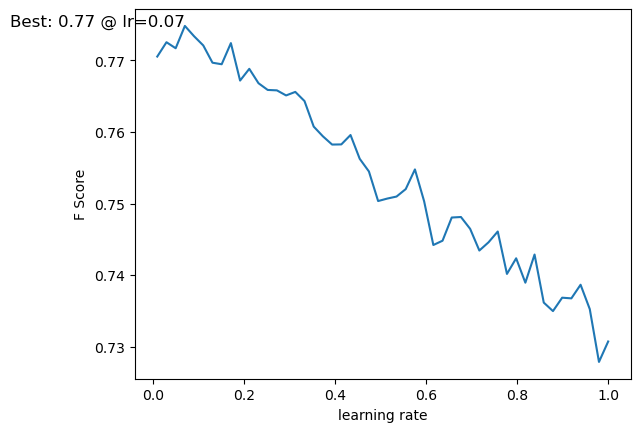

In [67]:
learning_rate_range = np.linspace(0.01, 1.0, 50) 
f1_scores = []
for learning_rate in learning_rate_range:
    clf = GradientBoostingClassifier(n_estimators=310, max_depth=4, verbose=0, learning_rate=learning_rate, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = calculate_fbeta_score(y_test, y_pred)
    f1_scores.append(f1)
best_index = np.argmax(f1_scores)
best_learning_rate = learning_rate_range[best_index]
best_f1 = f1_scores[best_index]
plt.plot(learning_rate_range, f1_scores)
plt.xlabel('learning rate')
plt.ylabel('F Score')
plt.text(best_learning_rate, best_f1, f'Best: {best_f1:.2f} @ lr={best_learning_rate:.2f}', fontsize=12, ha='right')
plt.show()

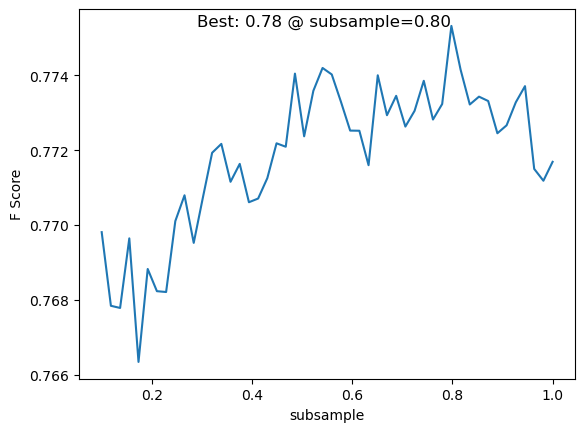

In [68]:
subsample_range = np.linspace(0.1, 1.0, 50)
f1_scores = []

for subsample in subsample_range:
    clf = GradientBoostingClassifier(n_estimators=310, max_depth=4, verbose=0, learning_rate=0.07, subsample=subsample, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = calculate_fbeta_score(y_test, y_pred)
    f1_scores.append(f1)

best_index = np.argmax(f1_scores)
best_subsample = subsample_range[best_index]
best_f1 = f1_scores[best_index]

plt.plot(subsample_range, f1_scores)
plt.xlabel('subsample')
plt.ylabel('F Score')
plt.text(best_subsample, best_f1, f'Best: {best_f1:.2f} @ subsample={best_subsample:.2f}', fontsize=12, ha='right')
plt.show()

In [94]:
loss_values = ['log_loss', 'exponential']
f1_scores = []
for loss in loss_values:
    clf = GradientBoostingClassifier(n_estimators=310,max_depth=4,learning_rate=0.07,loss=loss,random_state=42,subsample=0.8)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = calculate_fbeta_score(y_test, y_pred)
    f1_scores.append(f1)
best_index = np.argmax(f1_scores)
best_loss = loss_values[best_index]
best_f1 = f1_scores[best_index]
print(f"best loss: {best_loss}, F score: {best_f1:.4f}")

best loss: log_loss, F score: 0.7742


In [95]:
max_features_values = [None, 'sqrt', 'log2', 0.5, 0.7]
f1_scores = []
learning_rate = 0.1
n_estimators = 210
max_depth = 4
for max_features in max_features_values:
    clf = GradientBoostingClassifier(n_estimators=310,max_depth=4,learning_rate=0.07,max_features=max_features,random_state=42,loss='log_loss')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = calculate_fbeta_score(y_test, y_pred)
    f1_scores.append(f1)
best_index = np.argmax(f1_scores)
best_max_features = max_features_values[best_index]
best_f1 = f1_scores[best_index]
print(f"Лучшее значение max_features: {best_max_features}, F score: {best_f1:.4f}")

Лучшее значение max_features: 0.7, F score: 0.7727


Итоговая модель:

In [74]:
model = GradientBoostingClassifier(n_estimators=310, random_state=42, verbose=0, max_depth=4, learning_rate=0.07, max_features=0.7, loss='log_loss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = calculate_fbeta_score(y_test, y_pred) 
score

0.7726895406751523

Treshold:

In [96]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0, 1, 101)
fbeta_scores = []
for threshold in thresholds:
    y_pred_optimal = (y_pred_proba >= threshold).astype(int)    
    fbeta = calculate_fbeta_score(y_test, y_pred_optimal)
    fbeta_scores.append(fbeta)
best_threshold = thresholds[np.argmax(fbeta_scores)]
best_fbeta = np.max(fbeta_scores)
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F Score: {best_fbeta:.2f}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 760 out of 760 | elapsed:    0.1s finished


Best Threshold: 0.00
Best F Score: 0.75


### Итоговая модель

Voiting

In [88]:
fbeta_scorer = make_scorer(calculate_fbeta_score)

gbc = GradientBoostingClassifier(
n_estimators=310, random_state=42, verbose=0, max_depth=4, learning_rate=0.07, max_features=0.7, loss='log_loss')
rf = RandomForestClassifier(n_estimators= 760, ccp_alpha=0.03359818286283781, random_state=42, criterion = "log_loss", min_weight_fraction_leaf = 0.00, max_features = None, n_jobs=-1, verbose=1, class_weight='balanced', max_depth = 7, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, min_impurity_decrease = 0.0, bootstrap = True, warm_start=False)

voting_clf = VotingClassifier(estimators=[
    ('gbc', gbc),
    ('rf', rf)
], voting='soft')

scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring=fbeta_scorer)

print(f"F-beta score для VotingClassifier: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:    2.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 760 out of 760 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:    2.7s 

F-beta score для VotingClassifier: 0.7834 (+/- 0.0027)


[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:    2.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 760 out of 760 | elapsed:    0.0s finished


In [89]:
voting_clf.fit(X_train, y_train)
y_pred_proba = voting_clf.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1] 
thresholds = np.linspace(0, 1, 101)
scores = []

for threshold in thresholds:
    y_pred_optimal = (y_pred_proba >= threshold).astype(int) 
    score = calculate_fbeta_score(y_test, y_pred_optimal)
    scores.append(score)

best_threshold = thresholds[np.argmax(scores)]
best_score = max(scores)
print(f"Лучший порог: {best_threshold:.2f}, F-beta score: {best_score:.4f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:    3.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 760 out of 760 | elapsed:    0.1s finished


Лучший порог: 0.39, F-beta score: 0.8078
